# Simple

In [67]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [6]:
import requests
r = requests.get('http://gymplius.lt/klubo_uzimtumas/', headers={'User-Agent': 'Foo bar'}) #why? https://stackoverflow.com/questions/51268405/curl-and-python-requests-get-reporting-different-http-status-code
body = r.text;body

'\r\n\r\n\r\n\r\n\r\n\r\n\r\n<!DOCTYPE html>\n<html lang="en-US">\n<head>\n\n<!-- Global site tag (gtag.js) - Google Analytics -->\n<script async src="https://www.googletagmanager.com/gtag/js?id=UA-71534265-1"></script>\n<script>\n  window.dataLayer = window.dataLayer || [];\n  function gtag(){dataLayer.push(arguments);}\n  gtag(\'js\', new Date());\n\n  gtag(\'config\', \'UA-71534265-1\');\n</script>\n\n<!-- Google Tag Manager -->\n<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\nnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\nj=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n\'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n})(window,document,\'script\',\'dataLayer\',\'GTM-PZ3XTNM\');</script>\n<!-- End Google Tag Manager -->\n\n\n<!-- Facebook Pixel Code -->\n<script>\n  !function(f,b,e,v,n,t,s)\n  {if(f.fbq)return;n=f.fbq=function(){n.callMethod?\n  n.callMethod.apply(n,

In [12]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(body)
locs = ["vilnius_kalvarijos_88", "vilnius_mada_virsuliskiai", "vilnius_zemaite", "vilnius_taksi_pelesos", "vilnius_gedimino", "vilnius_ukmerge", "kaunas_baltai", "kaunas_kreve", "kaunas_pramone", "panevezys_ukmerges_g"]  
values = [int(soup.find(id=value).text) for value in locs]

values = []
for value in locs:
    values.append(int(soup.find(id=value).text)


In [17]:
from datetime import datetime

print(datetime.now(), end=", ")
for value in values:
    print(value, end=", ")

2020-05-22 11:30:17.772957, 27, 0, 3, 0, 1, 2, 0, 0, 0, 2, 

# Get API

In [7]:
r = requests.get('http://gymplius.lt/klubo_uzimtumas/?die=1', headers={'User-Agent': 'Foo bar'}) #why?
body = r.text

In [8]:
import json
dic = json.loads(body); dic

{'kaunas_baltai': 2,
 'kaunas_kreve': 11,
 'kaunas_pramone': 3,
 'panevezys_ukmerges_g': 17,
 'vilnius_gedimino': 14,
 'vilnius_kalvarijos_88': 1,
 'vilnius_kalvarijos_206': 0,
 'vilnius_mada_virsuliskiai': 18,
 'vilnius_taksi_pelesos': 13,
 'vilnius_ukmerge': 25,
 'vilnius_zemaite': 3}

In [9]:
dic['kaunas_baltai']

2

In [25]:
with open("gym_data.csv", "a") as f:
    f.write(f"{datetime.now()}, ")
    for key in dic:
        f.write(f"{dic[key]}, ")
    f.write("\n")

In [24]:
[print(key, end=", ") for key in dic]

kaunas_baltai, kaunas_kreve, kaunas_pramone, panevezys_ukmerges_g, vilnius_gedimino, vilnius_kalvarijos_88, vilnius_kalvarijos_206, vilnius_mada_virsuliskiai, vilnius_taksi_pelesos, vilnius_ukmerge, vilnius_zemaite, 

[None, None, None, None, None, None, None, None, None, None, None]

# Final

### TODO
- Test if file exist, if not add header from keys
- Sort key (returned json might be in different order)
- Test for apperence of new keys

In [ ]:
# Moved to gym.py
import requests
import json
from datetime import datetime
import time
while True:
    try:
        r = requests.get('http://gymplius.lt/klubo_uzimtumas/?die=1', headers={'User-Agent': 'Foo bar'})
        body = r.text
        dic = json.loads(body)
        with open("gym_data.csv", "a") as f:
            f.write(f"{datetime.now()}, ")
            for key in dic:
                f.write(f"{dic[key]}, ")
            f.write("\n")
    except Exception as e:
        print(e)
    finally:
        time.sleep(60)

# Analysis

In [33]:
import pandas as pd
df = pd.read_csv('gym_data.csv');df

,datetime,kaunas_baltai,kaunas_kreve,kaunas_pramone,panevezys_ukmerges_g,vilnius_gedimino,vilnius_kalvarijos_88,vilnius_kalvarijos_206,vilnius_mada_virsuliskiai,vilnius_taksi_pelesos,vilnius_ukmerge,vilnius_zemaite,
0,2020-05-22 11:45:28.558891,0,0,0,5,4,29,0,0,0,5,8,
1,2020-05-22 11:46:30.124950,0,0,0,7,4,29,0,1,0,5,8,
2,2020-05-22 11:47:32.582114,0,0,0,7,5,30,0,1,0,5,8,
3,2020-05-22 11:48:34.839733,0,0,0,8,6,30,0,1,0,5,8,
4,2020-05-22 11:49:37.391657,0,0,0,8,6,30,0,1,0,5,9,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13554,2020-06-01 10:51:56.808401,5,7,5,23,6,7,0,9,9,12,5,
13555,2020-06-01 10:52:58.452508,5,7,5,23,6,7,0,9,9,12,5,
13556,2020-06-01 10:54:00.301863,5,7,5,23,7,7,0,9,9,12,5,
13557,2020-06-01 10:55:02.765840,5,7,5,25,7,7,0,9,9,12,5,


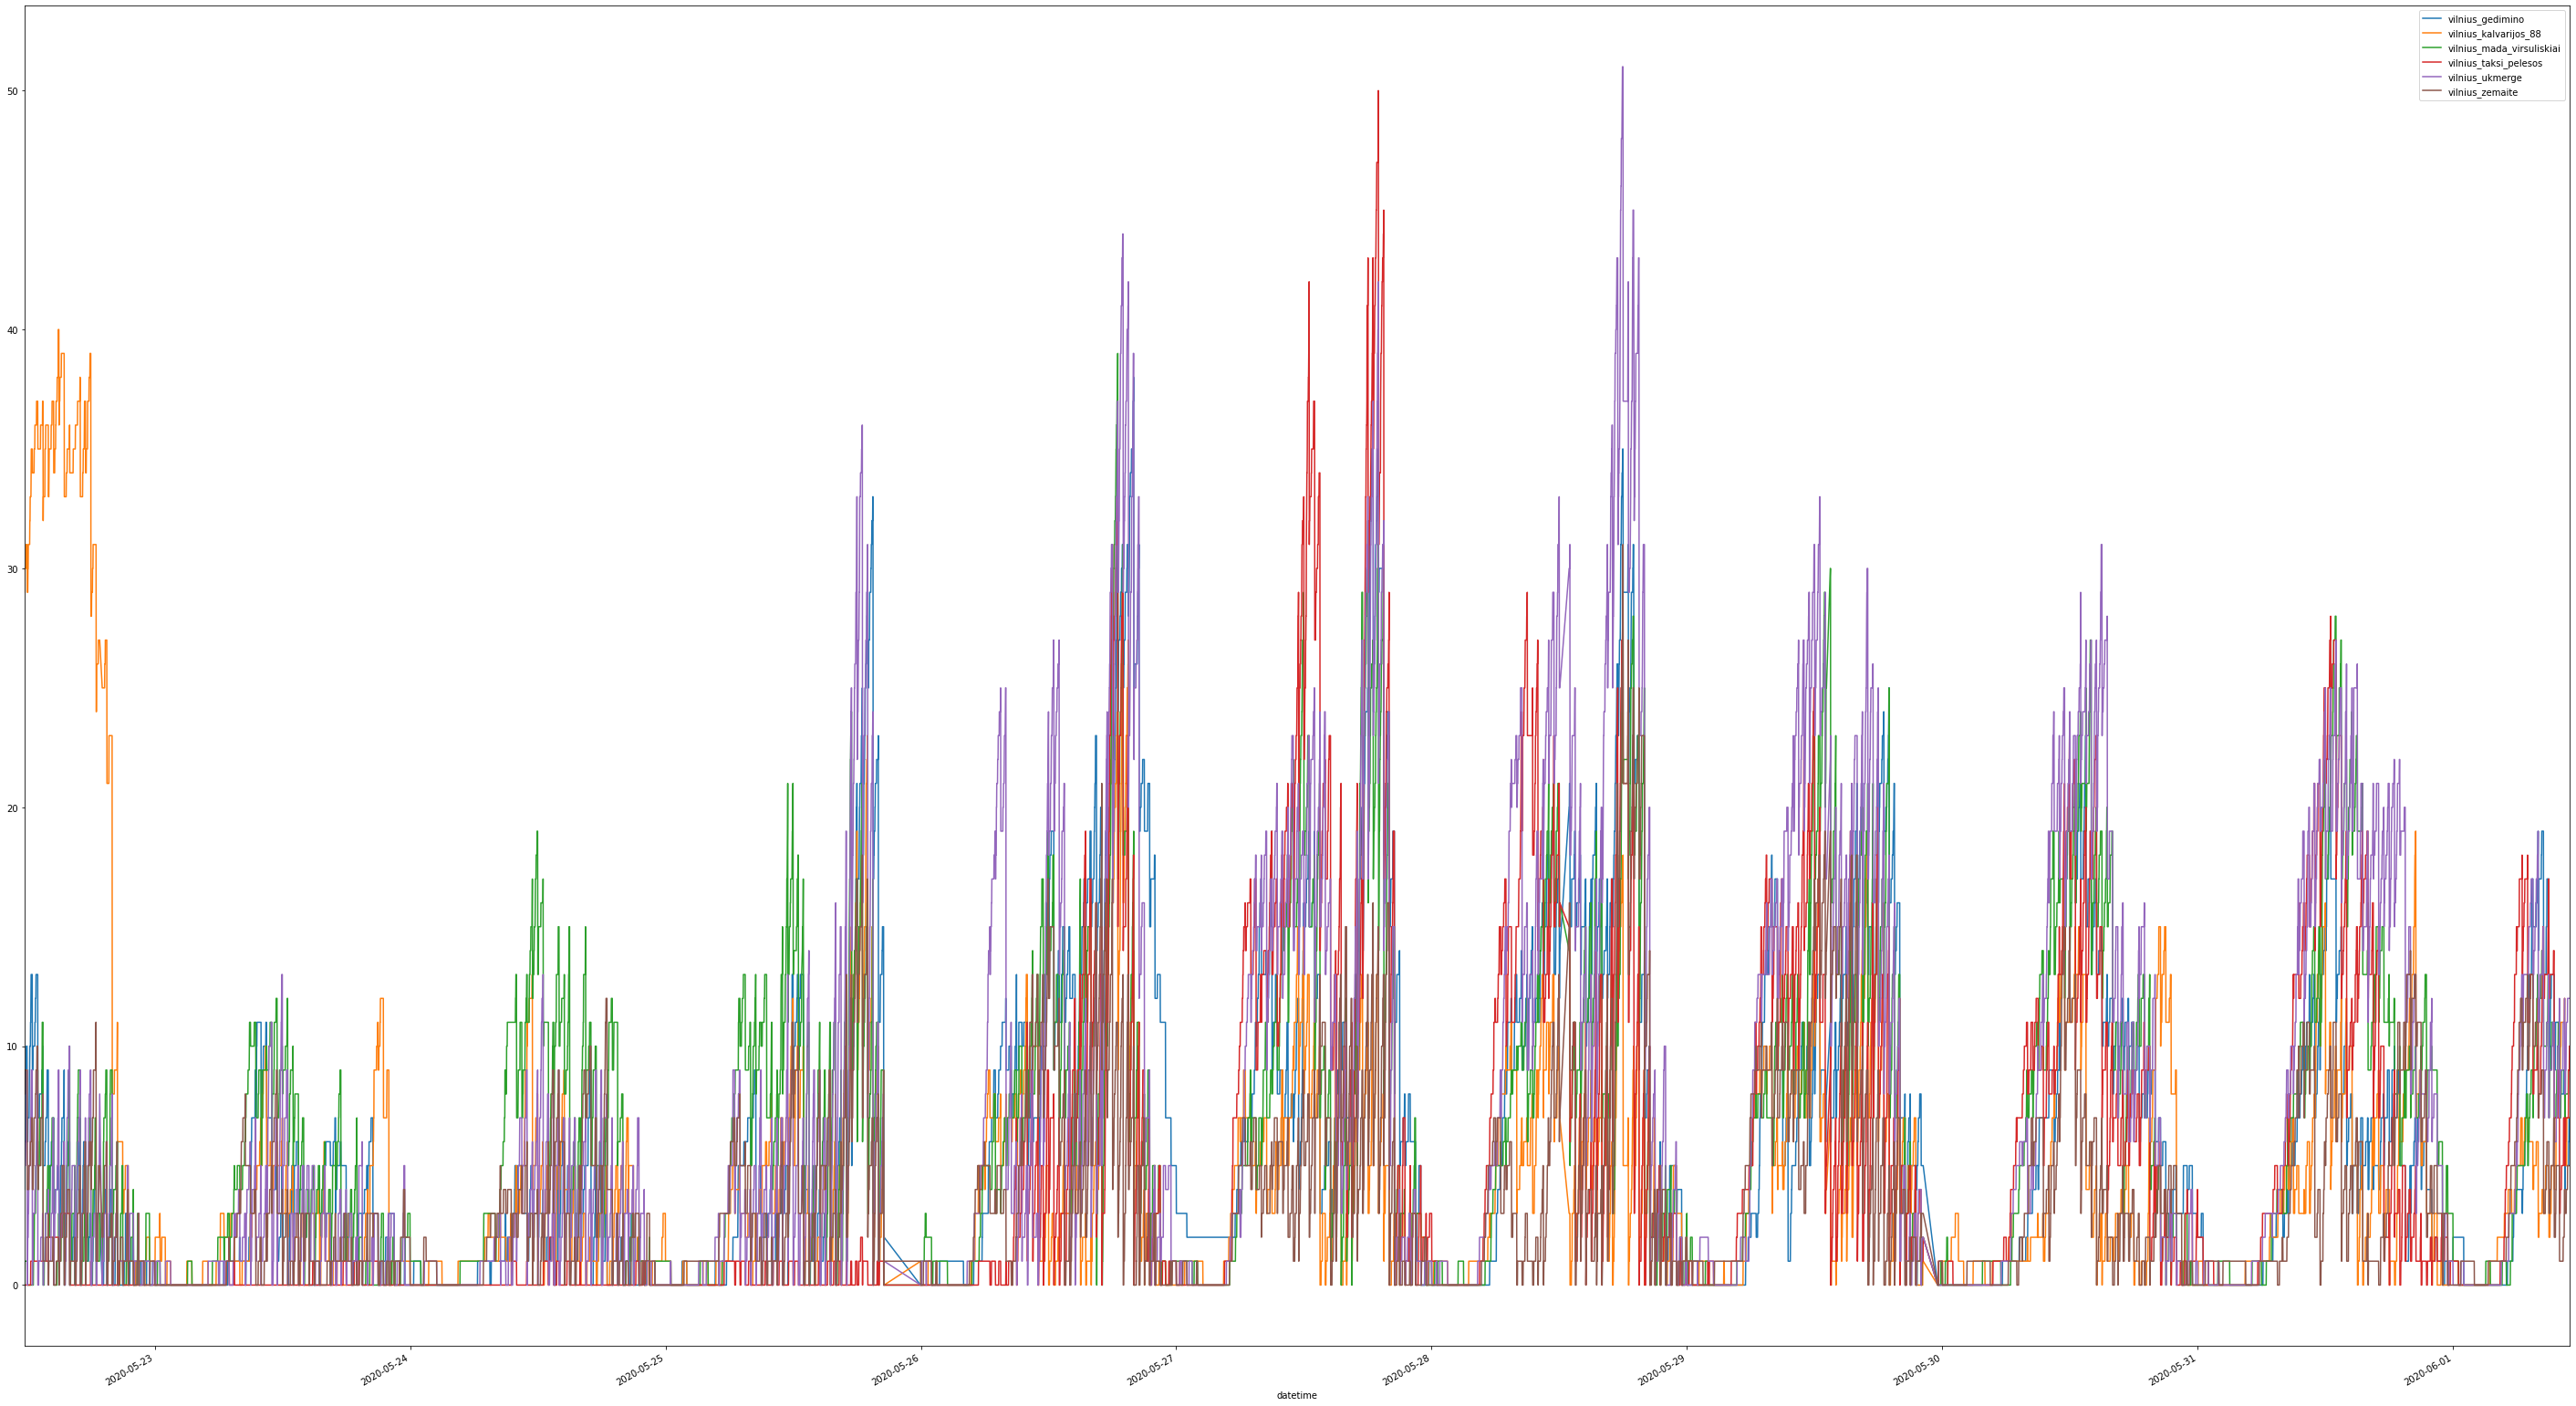

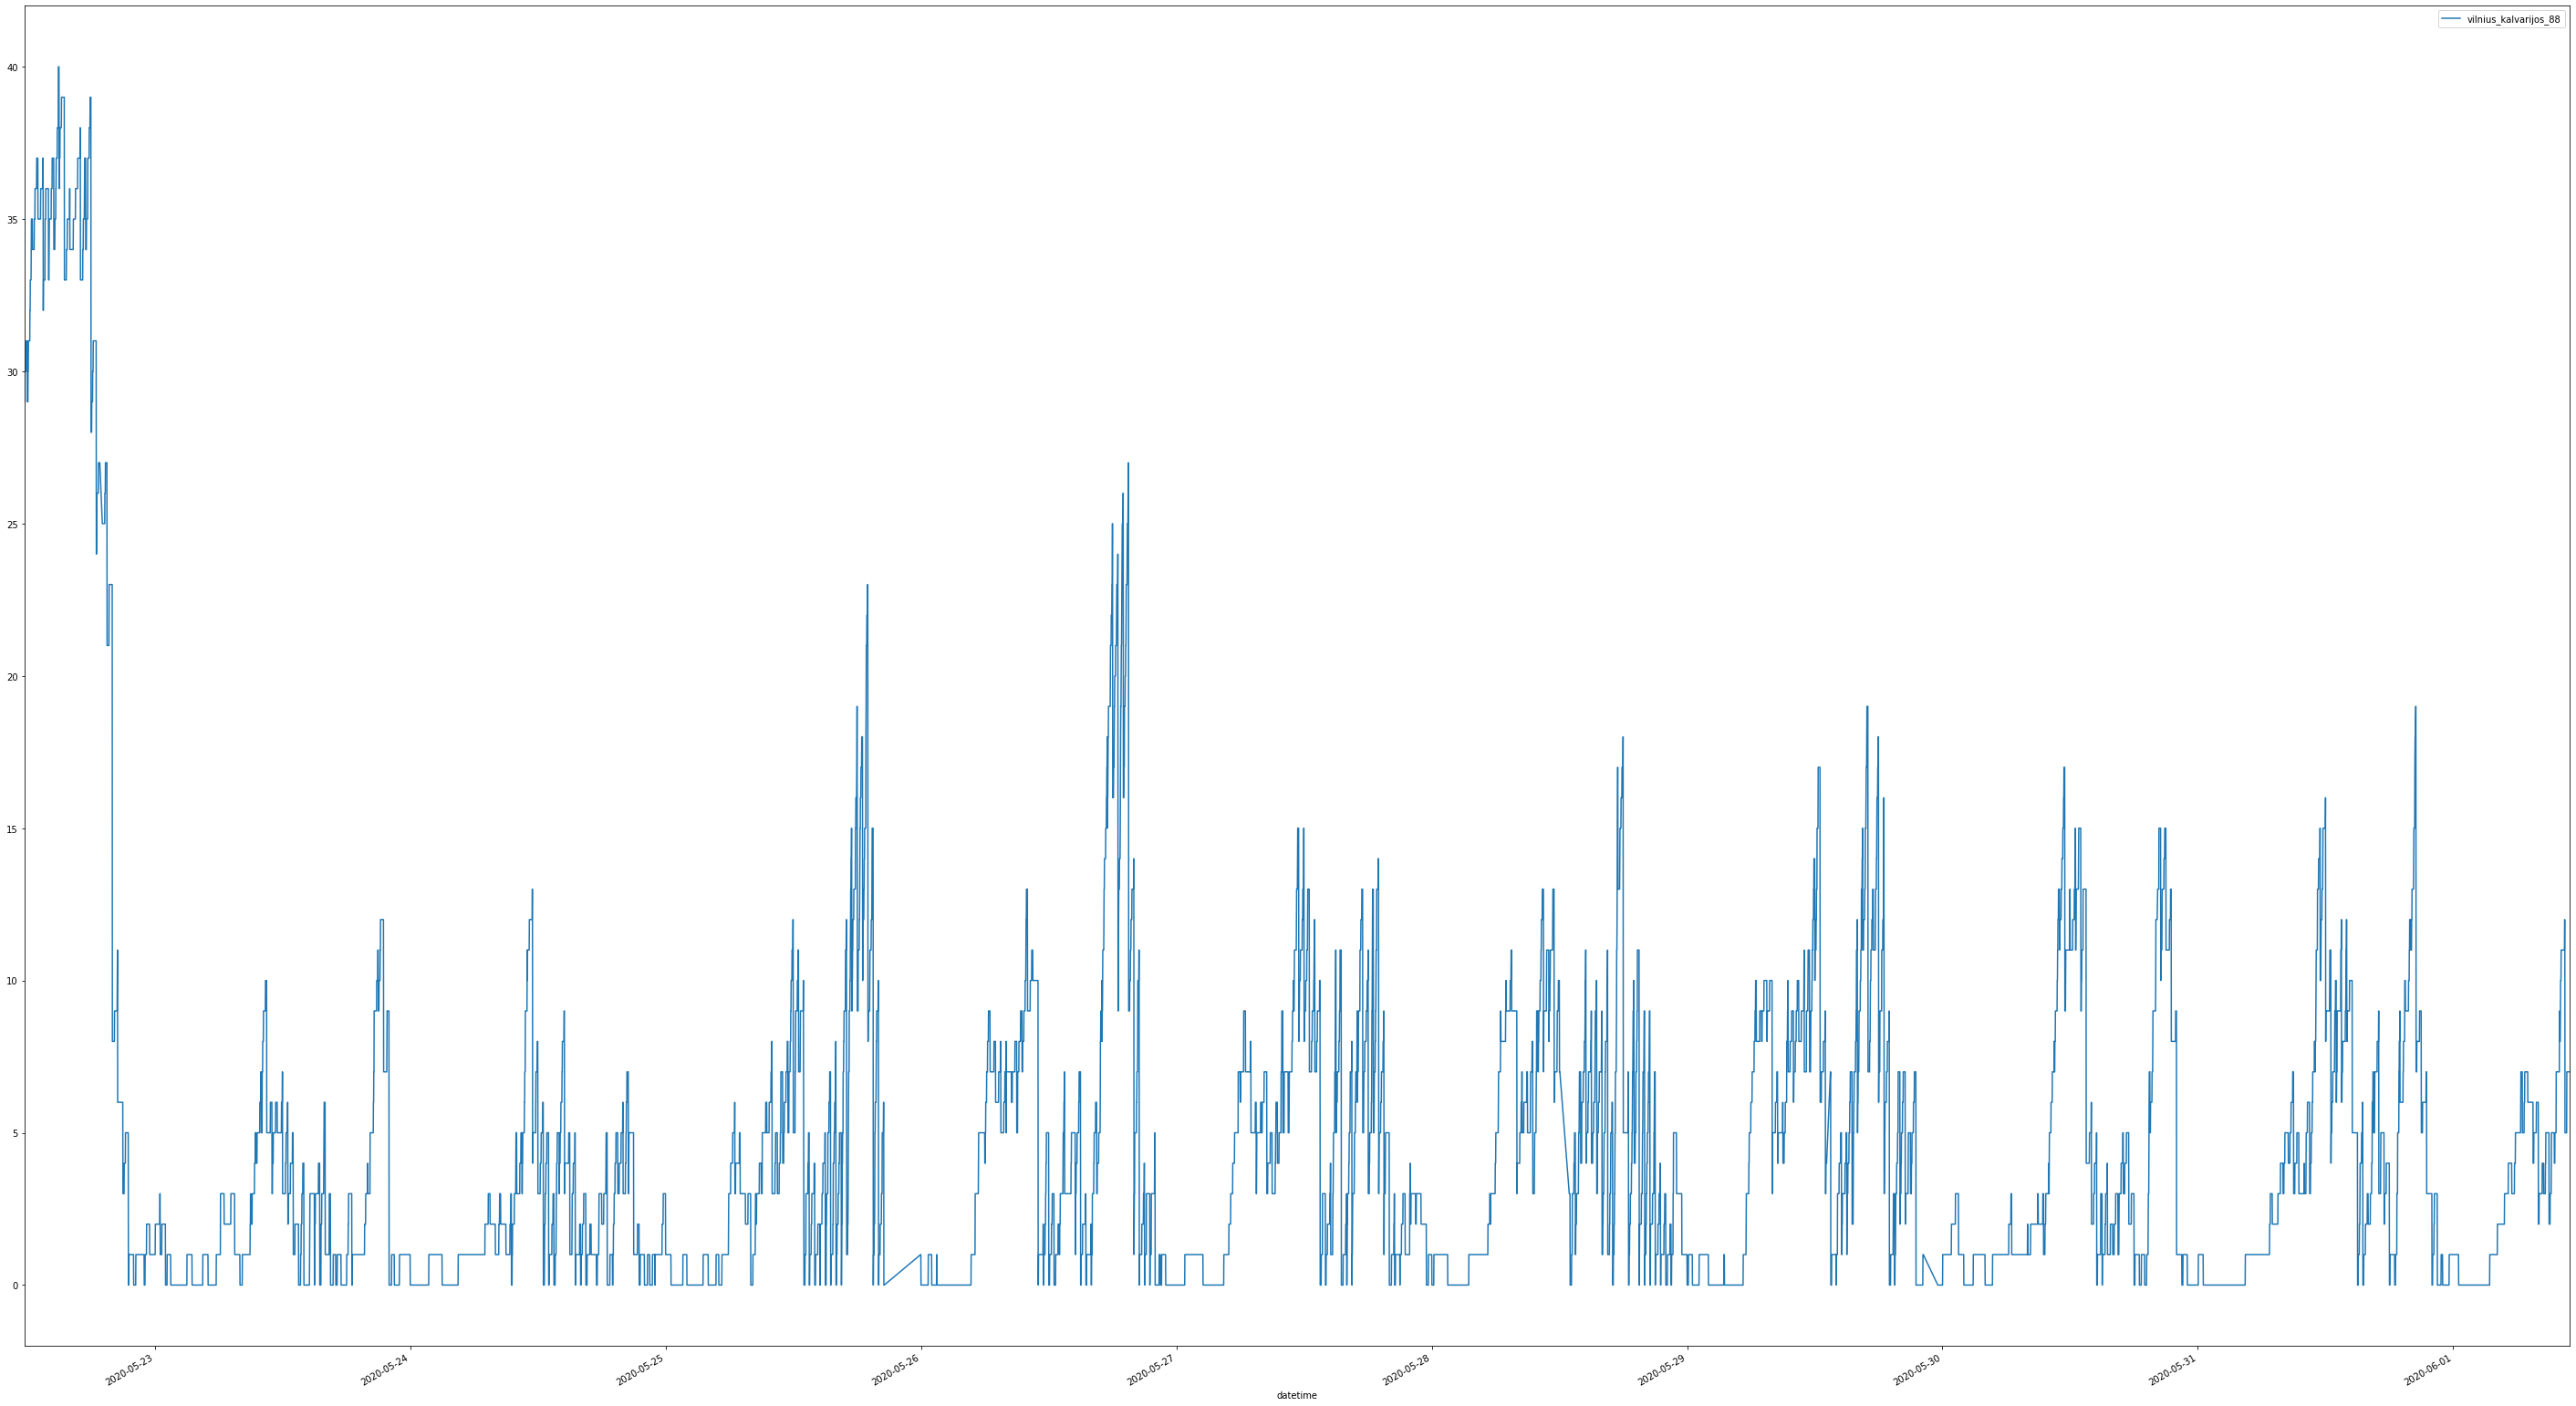

In [76]:
%matplotlib inline
#df_tmp = df[['datetime', 'vilnius_kalvarijos_88']];df_tmp

#df.plot(figsize=(50,30))
df[['vilnius_gedimino', 'vilnius_kalvarijos_88', 'vilnius_mada_virsuliskiai',
       'vilnius_taksi_pelesos', 'vilnius_ukmerge', 'vilnius_zemaite']].plot(figsize=(50,30),)
df[[ 'vilnius_kalvarijos_88',]].plot(figsize=(50,30),)